In [40]:
import csv
import matplotlib.pyplot as plt
import math

In [41]:
description = {
    0:'0 rest',
    1:'1 job',
    2:'2 sleep',
    3:'3 repair',
    4:'4 hobby',
    5:'5 lunch',
    6:'6 family',
    7:'7 research',
    8:'8 ',
    9:'9 fitness',
    10:'10 cleaning',
    11:'11 maintance',
}
summary = {item:0 for item in description.values()}

In [42]:
with open("data/2020.07.16.txt") as fp:
    reader = csv.reader(fp, delimiter=";", quotechar='\n')
    data_read = [ [int(val) for val in row]  for row in reader]

In [43]:
pre = 0
cycle_addiction = 65535;
cycle_step = 0;
for i in range(len(data_read)):
    if (i>0):
        if data_read[i][0]<data_read[i-1][0]:
            cycle_step+=1
        job = description[data_read[i-1][1]]        
        time_spent = data_read[i][0]+cycle_step*cycle_addiction-pre
        if time_spent>2:
            summary[job]+=time_spent
    pre = data_read[i][0]+cycle_step*cycle_addiction

In [44]:
empty_found = True
while empty_found:
    empty_found = False
    for rec in summary.keys():
        if summary[rec]==0:
            empty_found = True
            break
    if empty_found:
        summary.pop(rec)

In [45]:
labels = list(summary.keys())
values = list(summary.values())

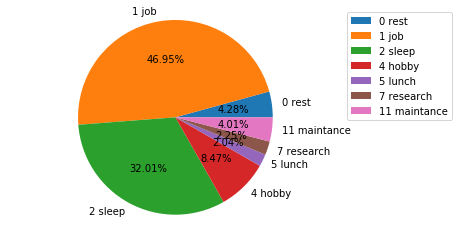

In [46]:
fig1, ax1 = plt.subplots()
 
wedges, texts, autotexts = ax1.pie(values, labels=labels, autopct='%1.2f%%')
ax1.axis('equal')
ax1.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.show()

In [47]:
for item in summary.items():
    print(item[0],round(item[1]/60/60,1),'h')

0 rest 1.0 h
1 job 11.2 h
2 sleep 7.6 h
4 hobby 2.0 h
5 lunch 0.5 h
7 research 0.5 h
11 maintance 1.0 h
